# 1. Introduction and Problem Understanding

Konteks Tujuan dari penelitian ini adalah untuk mengembangkan model klasifikasi yang kuat untuk data gambar dengan menggunakan teknik deep learning. Dataset terdiri dari 15.000 gambar secara keseluruhan, dibagi menjadi 15 kelas yang berbeda, masing-masing mewakili jenis sayuran yang berbeda.

**Konteks:**
* Load Data: Kami menggunakan ImageDataGenerator untuk memuat dan melakukan praproses terhadap 7.500 gambar secara berkelompok, untuk mengoptimalkan efisiensi komputasi.
* Augmentasi Data: Teknik seperti rotasi, pembalikan horizontal, pembesaran, geseran, dan pergeseran diterapkan untuk meningkatkan variasi dataset dan mencegah pencocokan yang berlebihan.
* Arsitektur Model: Kami menggunakan  model CNN dengan 4 lapisan konvolusi dan pooling untuk ekstraksi fitur.Flatten layer untuk meratakan hasil ekstraksi fitur.Dense layerdengan 15 neuron untuk klasifikasi ke dalam 15 kelas menggunakan probabilitas softmax.Optimizer Adam untuk pembelajaran cepat dan fungsi loss categorical cross-entropy untuk menangani multi-kelas. dan hasil akhir di dapatkan akurasi sebesar 0.8832 - loss: 0.3521 - val_accuracy: 0.9277 - val_loss: 0.2476

# 1.1 Gattering data

In [25]:
import os
import random
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [26]:
# inisiasi path data gambar
images_path = "Vegetable Images"
train_path = "Vegetable Images/train"
val_path = "Vegetable Images/validation"
test_path = "Vegetable Images/test"

In [27]:
subdirectories = [f.name for f in os.scandir(train_path) if f.is_dir()]

print("Daftar nama subdirektori:")
for subdir in subdirectories:
    print(subdir)

Daftar nama subdirektori:
Bean
Bitter_Gourd
Bottle_Gourd
Brinjal
Broccoli
Cabbage
Capsicum
Carrot
Cauliflower
Cucumber
Papaya
Potato
Pumpkin
Radish
Tomato


In [28]:
# fungsi untuk menampilkan contoh gambar secara acak
def view_random_image(data_dir, class_dir, n_row=1, n_col=1):
    target_dir = images_path + "/" + data_dir + "/" + class_dir + "/"

    rand_images = random.sample(os.listdir(target_dir), 4)

    fig, axs = plt.subplots(n_row, n_col)

    for i, ax in enumerate(axs.flat):
        img = mpimg.imread(target_dir + rand_images[i])
        ax.imshow(img)
        ax.set_title(f"{class_dir} {i+1}\n{img.shape}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()

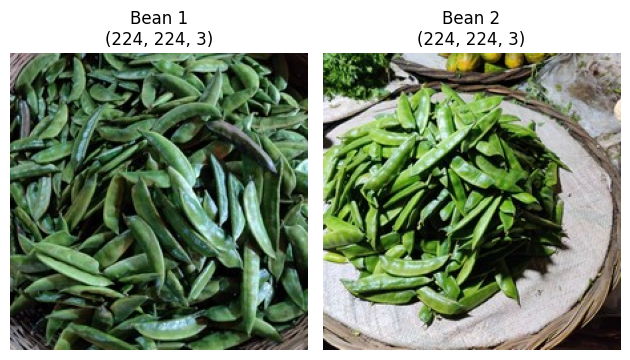

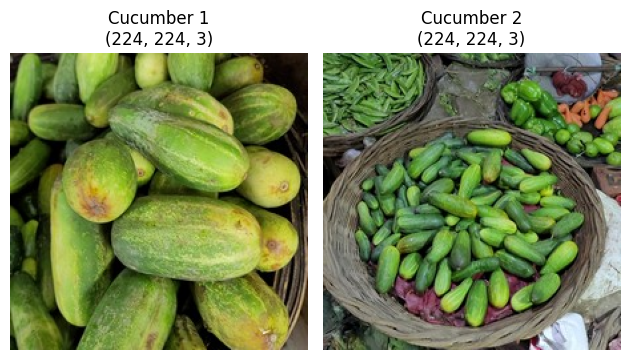

In [29]:
# contoh menampilkan gambar secara acak
view_random_image("train", "Bean", 1, 2)
view_random_image("train", "Cucumber", 1, 2)

# 1.2 Image data generator

In [30]:
#pip install --tensorflow==2.6 --proxy=http://192.168.43.1:9090

In [31]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [32]:
image_size = (224, 224)
batch_size = 32

# image augmentation data train
train_datagen = ImageDataGenerator(
    rescale = 1./255, #normalisasi pixel ke 0,1
    rotation_range = 20, #random rotasi image 20 derajat untuk memperkaya data pelatihan
    width_shift_range = 0.2, # random horizontal shift
    height_shift_range = 0.2, # random vertikal shift
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

#image augmentation data validasi
val_datagen = ImageDataGenerator(rescale= 1./255)

#image augmentation data test
test_datagen = ImageDataGenerator(rescale= 1./255)

#training datagenerator dengan augmentation
train_data = train_datagen.flow_from_directory(
    train_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'categorical',
)

#validasi datagenerator dengan augmentation
val_data = val_datagen.flow_from_directory(
    val_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'categorical',
)

#training datagenerator dengan augmentation
test_data = test_datagen.flow_from_directory(
    test_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = False
)

Found 7500 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


Kode ini mengimplementasikan image augmentation untuk meningkatkan keragaman data pelatihan, validasi, dan pengujian menggunakan ImageDataGenerator dari library Keras. Berikut adalah interpretasi dari setiap bagian:

Parameter Global
image_size = (224, 224):
Setiap gambar akan diubah ukurannya menjadi 224 x 224 piksel sebelum diproses. Ukuran ini sering digunakan dalam model deep learning populer seperti VGG atau ResNet.
Alasan pemilihan ukuran:

Mempercepat pelatihan.
Konsistensi ukuran input untuk convolutional layers.
batch_size = 32:
Jumlah gambar yang diproses dalam satu batch selama pelatihan. Nilai 32 adalah pilihan umum karena memberikan keseimbangan antara efisiensi komputasi dan stabilitas pembaruan gradien.

**Image Augmentation untuk Data Pelatihan**
Augmentasi dilakukan dengan menggunakan berbagai teknik untuk memperkaya dataset, mengurangi overfitting, dan meningkatkan kemampuan generalisasi model. Teknik yang digunakan:

* rescale = 1./255: Normalisasi piksel dari [0, 255] menjadi [0, 1] untuk mempercepat pelatihan.
* rotation_range = 20: Gambar dapat dirotasi hingga ±20 derajat secara acak.
* width_shift_range = 0.2: Menggeser gambar secara horizontal hingga 20% dari lebar gambar.
* height_shift_range = 0.2: Menggeser gambar secara vertikal hingga 20% dari tinggi gambar.
* shear_range = 0.2: Distorsi gambar dalam bentuk kemiringan.
* zoom_range = 0.2: Zoom gambar hingga ±20%.
* horizontal_flip = True: Membalik gambar secara horizontal.
* fill_mode = 'nearest': Jika augmentasi menghasilkan area kosong, area tersebut akan diisi menggunakan piksel tetangga terdekat.
* Image Augmentation untuk Validasi dan Tes
* Validasi dan tes menggunakan rescale saja (1./255), tanpa augmentasi lain.
Alasan: Validasi dan pengujian membutuhkan data yang konsisten untuk mengevaluasi performa model tanpa pengaruh variasi augmentasi.


**Data Generator**
* train_data:Membaca data dari direktori train_path:Gambar diubah ukurannya menjadi image_size (224x224).Dikelompokkan dalam batch batch_size (32).Dikategorikan berdasarkan class_mode='categorical' untuk multi-kelas.
  
* val_data:Membaca data dari direktori val_path:Hanya rescale dilakukan.

* test_data:Membaca data dari direktori test_path:Sama dengan validasi, hanya rescale dilakukan.shuffle=False memastikan urutan data tes tidak acak, berguna untuk mengevaluasi hasil model.


**Manfaat Pendekatan**
Data Pelatihan: Augmentasi memperkaya data untuk mengurangi overfitting.
Data Validasi dan Tes: Tidak ada augmentasi selain rescale agar hasil evaluasi lebih akurat dan representatif.


# 2.1 Model CNN

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [34]:
# Cek apakah GPU terdeteksi
if tf.test.gpu_device_name():
    print(f"GPU detected: {tf.test.gpu_device_name()}")
else:
    print("No GPU detected")

No GPU detected


In [35]:
#membuat model sequential
model_1 = Sequential()

# Lapisan Konvolusi dan Pooling
model_1.add (Conv2D (filters = 16, kernel_size=(3,3), activation= 'relu', input_shape= (224, 224, 3)))
model_1.add (MaxPool2D ((2,2), padding='same'))
model_1.add (Conv2D (32, (3,3), activation= 'relu'))
model_1.add (MaxPool2D ((2,2), padding='same'))
model_1.add (Conv2D (32 ,(3,3), activation= 'relu'))
model_1.add (MaxPool2D ((2,2), padding='same'))
model_1.add (Conv2D (64 ,(3,3), activation= 'relu'))
model_1.add (MaxPool2D ((2,2), padding='same'))

# Flatten lapisan untuk input ke Dense
model_1.add(Flatten())

# Dense layer
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(15, activation='softmax'))

#model compile
model_1.compile(
    optimizer= Adam(),
    loss= 'categorical_crossentropy',
    metrics=['accuracy']
)

history_1 = model_1.fit(
    train_data,
    validation_data= val_data,
    epochs = 10
)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 237s 993ms/step - accuracy: 0.2284 - loss: 2.2463 - val_accuracy: 0.5040 - val_loss: 1.3744
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 215s 914ms/step - accuracy: 0.5271 - loss: 1.3554 - val_accuracy: 0.7493 - val_loss: 0.7552
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 208s 886ms/step - accuracy: 0.6765 - loss: 0.9637 - val_accuracy: 0.7767 - val_loss: 0.6558
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 486s 2s/step - accuracy: 0.7455 - loss: 0.7853 - val_accuracy: 0.8420 - val_loss: 0.4899
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 286s 1s/step - accuracy: 0.7957 - loss: 0.6329 - val_accuracy: 0.8380 - val_loss: 0.4534
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 279s 1s/step - accuracy: 0.8120 - loss: 0.5650 - val_accuracy: 0.8763 - val_loss: 0.3918
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 332s 1s/step - accuracy: 0.8451 - loss: 0.4704 - val_accuracy: 0.8117 - val_loss: 0.5585
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 367s 2s/step - accuracy: 0.8554 - loss: 0.4541 -

Interpretasi Kode :
---

### **1. Membuat Model Sequential**
- **`model_1 = Sequential()`**  
  Model Sequential digunakan untuk membangun arsitektur jaringan secara linear, di mana setiap lapisan ditambahkan secara berurutan.

---

### **2. Lapisan Konvolusi dan Pooling**
1. **Conv2D (Layer Konvolusi)**:
   - **`filters=16`**: Layer pertama memiliki 16 filter untuk mendeteksi fitur sederhana, seperti tepi atau sudut.
   - **`kernel_size=(3,3)`**: Ukuran filter adalah 3x3 piksel, ukuran umum untuk mendeteksi pola lokal pada gambar.
   - **`activation='relu'`**: Fungsi aktivasi Rectified Linear Unit (ReLU) digunakan untuk menambahkan non-linearitas.
   - **`input_shape=(224, 224, 3)`**: Input layer menerima gambar berukuran 224x224 piksel dengan 3 saluran warna (RGB).

2. **MaxPooling2D (Pooling Layer)**:
   - **`pool_size=(2,2)`**: Mengurangi dimensi spasial (panjang dan lebar) gambar dengan mengambil nilai maksimum dari setiap blok 2x2.
   - **`padding='same'`**: ada padding tambahan

3. **Lapisan Konvolusi dan Pooling Berikutnya**:
   - **Layer ke-2**: `Conv2D(32)` dengan 32 filter.
   - **Layer ke-3**: `Conv2D(32)` dengan 32 filter lagi.
   - **Layer ke-4**: `Conv2D(64)` dengan 64 filter untuk mendeteksi fitur yang lebih kompleks.  
     Setiap lapisan konvolusi diikuti oleh pooling untuk mengurangi dimensi dan mencegah overfitting.

---

### **3. Flatten Layer**
- **`model_1.add(Flatten())`**  
  Mengubah output dari lapisan konvolusi dan pooling yang berbentuk matriks (dimensi 2D) menjadi vektor 1D.  
  **Tujuan**: Menghubungkan output konvolusi ke Dense layer.

---

### **4. Dense Layer**
 **`Dense(64, activation='relu')`** 
- **`Dense(15, activation='softmax')`**  
  Fully connected layer dengan:
  - **15 neuron**: Menyelesaikan klasifikasi untuk 15 kelas (misalnya klasifikasi jenis sayuran sesuai proyek Anda).
  - **Softmax activation**: Menghasilkan probabilitas untuk setiap kelas, sehingga hasil akhir adalah distribusi probabilitas total = 1.

---

### **5. Model Compile**
- **`optimizer=Adam()`**:  
  Optimizer Adam digunakan untuk mempercepat konvergensi model dengan adaptive learning rates.
- **`loss='categorical_crossentropy'`**:  
  Fungsi loss untuk klasifikasi multi-kelas, cocok untuk **`class_mode='categorical'`** dari generator.
- **`metrics=['accuracy']`**:  
  Model akan melacak akurasi sebagai metrik evaluasi.

---

### **6. Pelatihan Model**
- **`history_1 = model_1.fit()`**:
  - **`train_data`**: Data pelatihan dengan augmentasi.
  - **`validation_data=val_data`**: Data validasi untuk mengevaluasi model di setiap epoch.
  - **`epochs=10`**: Model akan dilatih selama 10 epoch.  
    Epoch adalah satu kali iterasi melalui seluruh dataset.

---

### **Kesimpulan**
Model ini adalah jaringan konvolusi sederhana untuk klasifikasi gambar dengan:
1. **4 lapisan konvolusi** dan **pooling** untuk ekstraksi fitur.
2. **Flatten layer** untuk meratakan hasil ekstraksi fitur.
3. **Dense layer** dengan 15 neuron untuk klasifikasi ke dalam 15 kelas menggunakan probabilitas softmax.
4. Optimizer Adam untuk pembelajaran cepat dan fungsi loss categorical cross-entropy untuk menangani multi-kelas.  



# 2.2 menyimpan dan memuat model

In [38]:
from tensorflow.keras.models import load_model

model_json = model_1.to_json()
with open("model_CNN.json", "w") as json_file:
    json_file.write(model_json)
print("Model architecture saved as JSON.")

model_1.save('model_CNN.h5')
model_1.save('model_CNN.keras')



Model architecture saved as JSON.


In [39]:
# Fungsi untuk menggambar learning curve
def plot_learning_curve(history):
    # Plot Akurasi
    plt.figure(figsize=(12, 6))

    # Akurasi
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

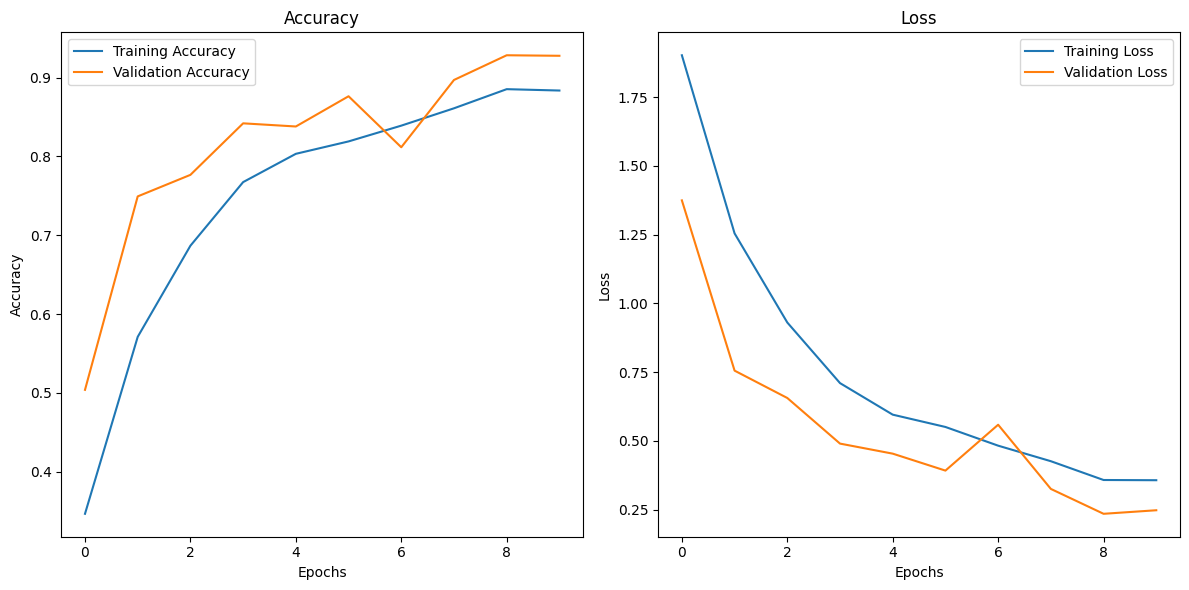

In [40]:
plot_learning_curve(history_1)

In [41]:
import json

with open('history.json', 'w') as f:
    json.dump(history_1.history, f)

In [42]:
print(history_1.history)

{'accuracy': [0.3467999994754791, 0.5712000131607056, 0.6868000030517578, 0.76746666431427, 0.8033333420753479, 0.8190666437149048, 0.8390666842460632, 0.8610666394233704, 0.8853333592414856, 0.8835999965667725], 'loss': [1.9019180536270142, 1.2541916370391846, 0.9302207231521606, 0.7098982930183411, 0.5951836109161377, 0.5504249334335327, 0.4824317693710327, 0.4259122610092163, 0.3575941026210785, 0.3568100035190582], 'val_accuracy': [0.5040000081062317, 0.7493333220481873, 0.7766666412353516, 0.8420000076293945, 0.8379999995231628, 0.8763333559036255, 0.8116666674613953, 0.8970000147819519, 0.9283333420753479, 0.9276666641235352], 'val_loss': [1.374359369277954, 0.755222499370575, 0.655785322189331, 0.4899364709854126, 0.4534090459346771, 0.39176619052886963, 0.5585407018661499, 0.32516950368881226, 0.2347179800271988, 0.2476004660129547]}


# 2.3 Evaluasi dan Prediks

In [43]:
model_1.evaluate(test_data)

c:\Users\Yogisagara\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


94/94 ━━━━━━━━━━━━━━━━━━━━ 92s 989ms/step - accuracy: 0.9252 - loss: 0.2421


[0.26352658867836, 0.9166666865348816]

In [44]:
predictions = model_1.predict(test_data)

94/94 ━━━━━━━━━━━━━━━━━━━━ 22s 220ms/step


## Test predict image

In [1]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt

# Fungsi untuk memuat model yang telah dilatih
def load_trained_model(model_path):
    model = load_model(model_path)  # Muat model dari file .h5
    return model

# Fungsi untuk memproses gambar dan membuat prediksi
def predict_image(image_path, model, class_labels):
    # Memuat gambar dan mengubah ukuran sesuai dengan input model
    img = load_img(image_path, target_size=(224, 224))  # Gambar diubah menjadi ukuran 224x224
    img_array = img_to_array(img) / 255.0  # Normalisasi gambar
    img_array = np.expand_dims(img_array, axis=0)  # Menambah dimensi batch
    
    # Prediksi kelas gambar
    predictions = model.predict(img_array)
    
    # Menentukan kelas dengan probabilitas tertinggi
    predicted_class = class_labels[np.argmax(predictions)]
    confidence = np.max(predictions)
    
    return predicted_class, confidence

# Daftar label kelas sayuran sesuai urutan
class_labels = [
    "Bean", "Bitter_Gourd", "Bottle_Gourd", "Brinjal", "Broccoli",
    "Cabbage", "Capsicum", "Carrot", "Cauliflower", "Cucumber",
    "Papaya", "Potato", "Pumpkin", "Radish", "Tomato"
]

# Muat model yang telah dilatih
model_path = 'model_CNN.keras'  # Ganti dengan path model Anda
model = load_trained_model(model_path)

# Prediksi gambar
image_path = 'Vegetable Images/test/Bean/0001.jpg'  # Ganti dengan path gambar yang ingin diprediksi
predicted_class, confidence = predict_image(image_path, model, class_labels)

# Tampilkan hasil prediksi
print(f"Predicted Class: {predicted_class}")
print(f"Confidence: {confidence:.2f}")


c:\Users\Yogisagara\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 14 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
Predicted Class: Bean
Confidence: 0.98


In [46]:
pip install seaborn --proxy=http://192.168.43.1:9090

Note: you may need to restart the kernel to use updated packages.


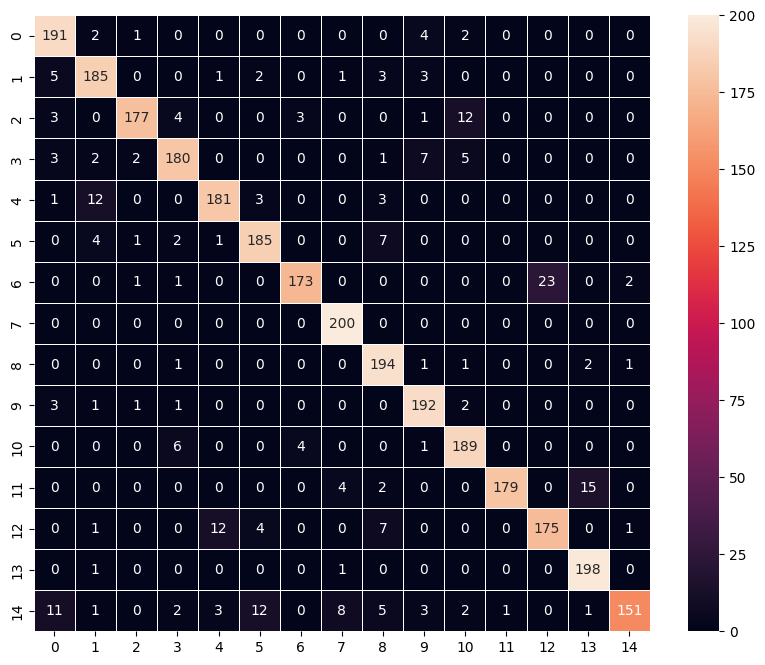

In [47]:
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Mengkonversi prediksi menjadi label kelas
y_pred_class = np.argmax(predictions, axis=1)
y_true_class = test_data.classes


fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix(y_true_class, y_pred_class),
    annot=True,
    annot_kws={"fontsize": 10},
    fmt=".0f",
    linewidth=0.5,
    square=True,
)
plt.show()